In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import sys
import os
sys.path.append(os.path.join(os.getcwd(), os.pardir))

In [32]:
from io_utils import load_matrices_from_dir, load_models
from scipy.sparse.linalg import norm

In [33]:
matrix = "vanbody"
errorfree_iterations = 491

In [34]:
mats = load_matrices_from_dir("../matrices/raw", subset=[matrix])
mat = list(mats.values())[0]
mat

<47072x47072 sparse matrix of type '<class 'numpy.float64'>'
	with 2329056 stored elements in Compressed Sparse Column format>

In [35]:
chosen_models = {
    "bcsstk18": "RandomForestRegressor",
    "cbuckle": "KNeighborsRegressor",
    "ct20stif": "XGBRegressor",
    "raefsky4": "RandomForestRegressor",
    "vanbody": "RandomForestRegressor",
}
model_path = f"./models/{matrix}/best_{chosen_models[matrix]}.pkl"
model = load_models([model_path])[0]
model

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=4, n_estimators=50))])

In [36]:
pos_2norms = {pos: norm(mat.getrow(pos)) for pos in range(mat.shape[0])}
iter_norm_pairs = np.array([[i, pos_2norms[pos], pos] for pos in range(mat.shape[0])
                              for i in range(errorfree_iterations)])
df = pd.DataFrame(iter_norm_pairs, columns=["i", "2norm", "rowid"])
df["output"] = model.predict(df[["i", "2norm"]].to_numpy())
df.head()

,i,2norm,rowid,output
0,0.0,2.542424e+06,0.0,44.651134
1,1.0,2.542424e+06,0.0,44.651134
2,2.0,2.542424e+06,0.0,46.299205
3,3.0,2.542424e+06,0.0,33.900549
4,4.0,2.542424e+06,0.0,34.844949


In [37]:
df_piv = df.pivot(index=["2norm", "rowid"], columns="i", values="output")

protections = df_piv.to_numpy()
print(protections.shape, mat.shape, 11948 * 432)
df_piv.head()

(47072, 491) (47072, 47072) 5161536


,i,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,481.0,482.0,483.0,484.0,485.0,486.0,487.0,488.0,489.0,490.0
2norm,rowid,,,,,,,,,,,,,,,,,,,,,
6.038983,29381.0,8.418773,8.418773,8.418773,8.426635,8.426635,8.426635,8.426635,9.051348,9.051348,9.051348,...,9.999913,9.999913,11.049458,11.049458,11.049458,12.500904,12.500904,12.500904,12.500904,12.500904
7.432166,5253.0,8.418773,8.418773,8.418773,8.426635,8.426635,8.426635,8.426635,9.051348,9.051348,9.051348,...,9.999913,9.999913,11.049458,11.049458,11.049458,12.500904,12.500904,12.500904,12.500904,12.500904
8.819495,42024.0,8.418773,8.418773,8.418773,8.426635,8.426635,8.426635,8.426635,9.051348,9.051348,9.051348,...,9.999913,9.999913,11.049458,11.049458,11.049458,12.500904,12.500904,12.500904,12.500904,12.500904
9.207319,4125.0,8.418773,8.418773,8.418773,8.426635,8.426635,8.426635,8.426635,9.051348,9.051348,9.051348,...,9.999913,9.999913,11.049458,11.049458,11.049458,12.500904,12.500904,12.500904,12.500904,12.500904
23.405054,29363.0,8.418773,8.418773,8.418773,8.426635,8.426635,8.426635,8.426635,9.051348,9.051348,9.051348,...,9.999913,9.999913,11.049458,11.049458,11.049458,12.500904,12.500904,12.500904,12.500904,12.500904


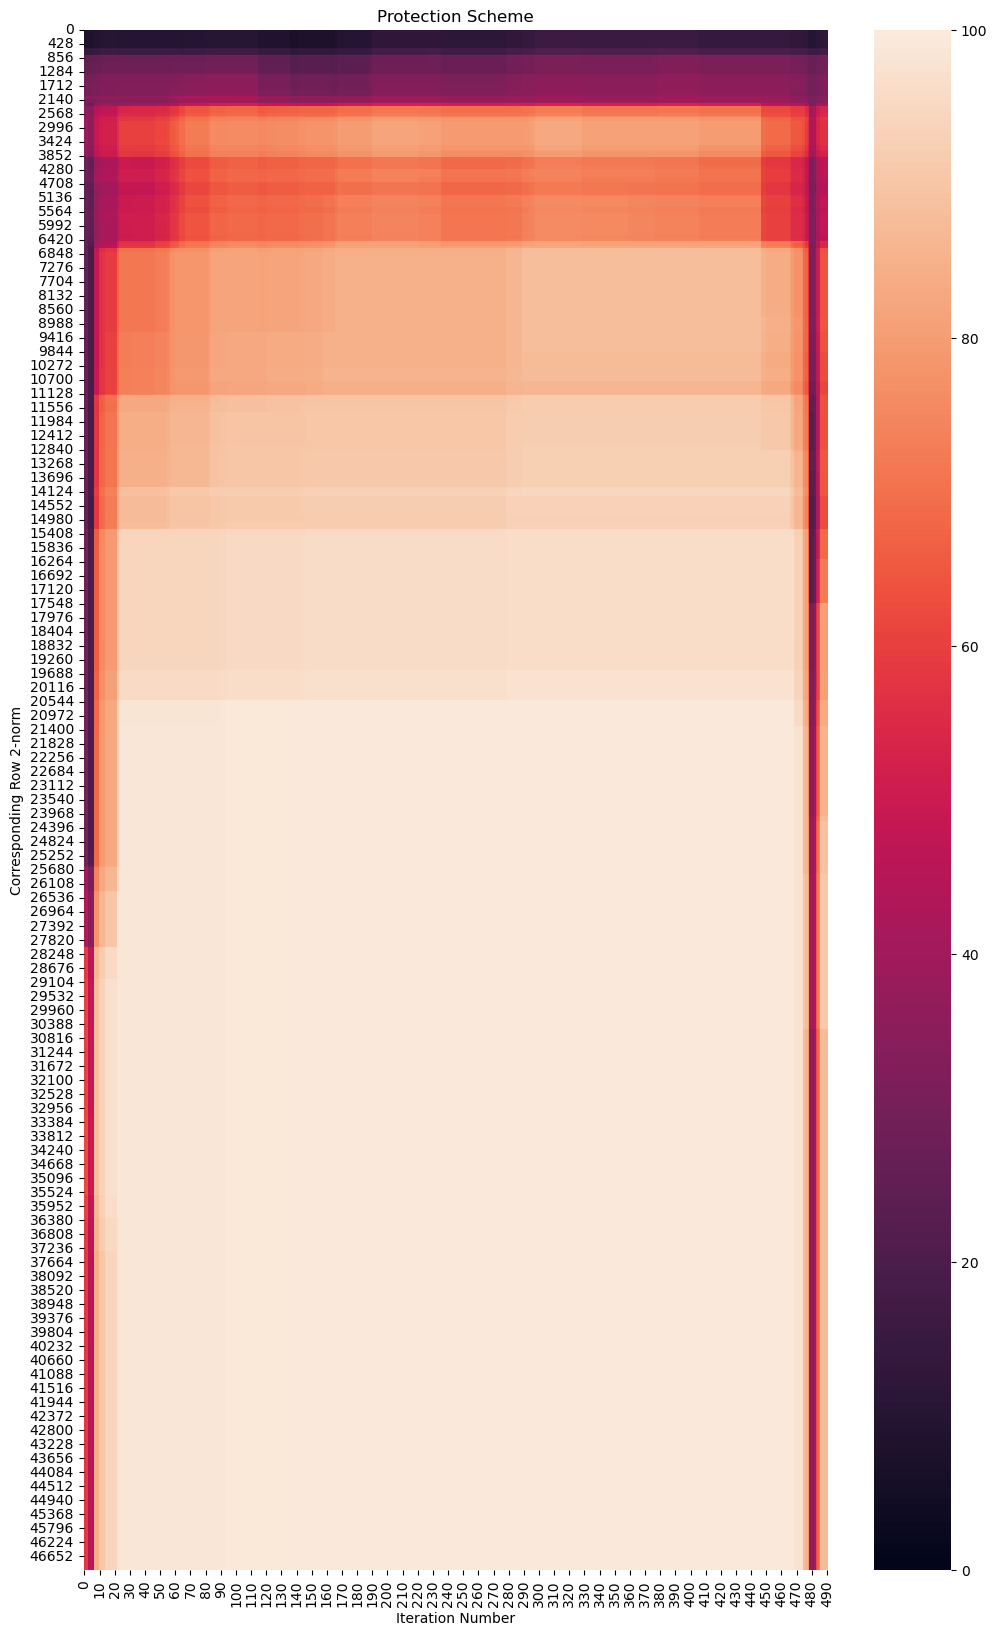

In [38]:
plt.gcf().set_size_inches(12, 20)
plt.gcf().set_dpi(100)
heatmap(protections, vmin=0, vmax=100)
plt.title("Protection Scheme")
plt.xlabel("Iteration Number")
plt.ylabel("Corresponding Row 2-norm")
plt.savefig(f"./figures/{matrix}/iter_r2n_output.png")
plt.show()

In [39]:
df_piv = df.pivot(index=["rowid"], columns="i", values="output")

protections = df_piv.to_numpy()
print(protections.shape, mat.shape, 11948 * 432)
df_piv.head()

(47072, 491) (47072, 47072) 5161536


i,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,481.0,482.0,483.0,484.0,485.0,486.0,487.0,488.0,489.0,490.0
rowid,,,,,,,,,,,,,,,,,,,,,
0.0,44.651134,44.651134,46.299205,33.900549,34.844949,34.844949,34.844949,77.964360,77.964360,77.964360,...,39.875091,43.889035,65.754783,71.661698,76.654142,90.864611,90.864611,90.864611,90.864611,90.864611
1.0,29.174371,29.174371,30.822442,18.771648,19.716047,19.716047,19.716047,65.713803,65.713803,65.713803,...,31.395069,35.409013,56.250403,60.993558,65.986002,80.196471,80.196471,80.196471,80.196471,80.196471
2.0,26.336566,26.336566,26.336566,23.784957,23.784957,23.784957,23.784957,37.011580,37.011580,37.011580,...,31.120038,32.632326,40.849636,41.649858,41.649858,44.896104,44.896104,44.896104,44.896104,44.896104
3.0,44.651134,44.651134,46.299205,33.900549,34.844949,34.844949,34.844949,77.964360,77.964360,77.964360,...,39.875091,43.889035,65.754783,71.661698,76.654142,90.864611,90.864611,90.864611,90.864611,90.864611
4.0,29.174371,29.174371,30.822442,18.771648,19.716047,19.716047,19.716047,65.657802,65.657802,65.657802,...,23.268423,27.282367,48.123757,52.866912,57.859356,72.069825,72.069825,72.069825,72.069825,72.069825


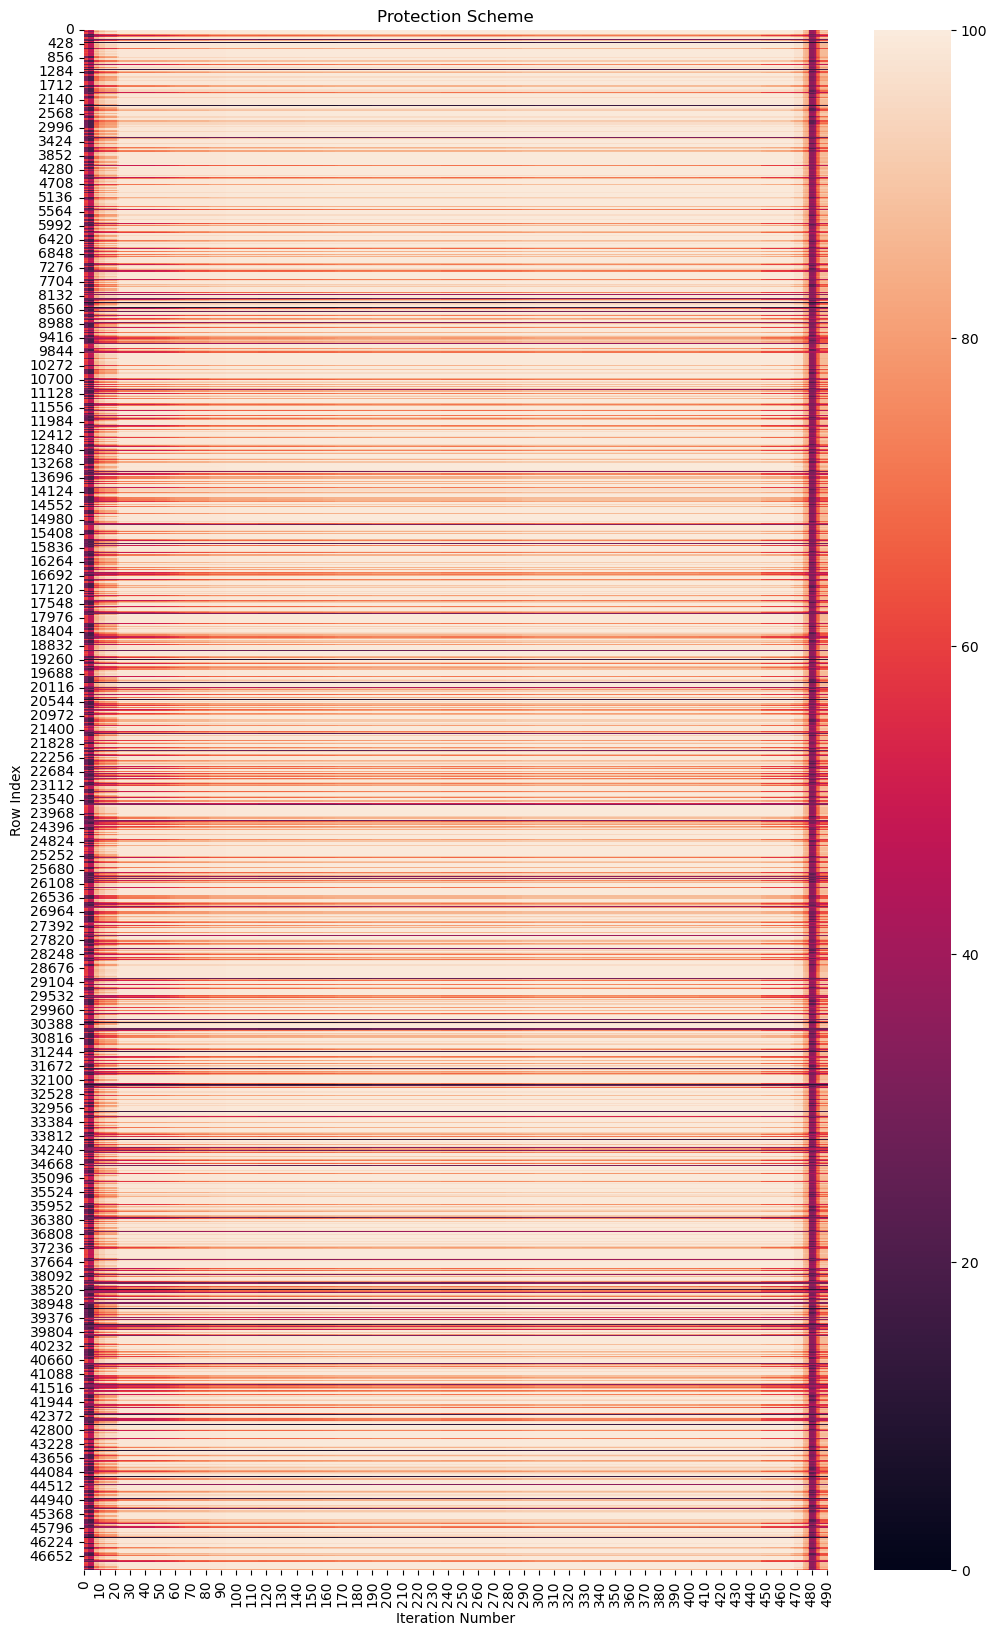

In [40]:
plt.gcf().set_size_inches(12, 20)
plt.gcf().set_dpi(100)
heatmap(protections, vmin=0, vmax=100)
plt.title("Protection Scheme")
plt.xlabel("Iteration Number")
plt.ylabel("Row Index")
plt.savefig(f"./figures/{matrix}/iter_row_output.png")
plt.show()